In [45]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.15 s (started: 2021-05-24 07:27:30 +00:00)


In [46]:
!pip install bing-image-downloader

time: 3.05 s (started: 2021-05-24 07:27:33 +00:00)


In [47]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists
time: 129 ms (started: 2021-05-24 07:27:36 +00:00)


In [48]:
from bing_image_downloader import downloader
downloader.download("dog",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://vuing.com/wp-content/uploads/2016/03/funny-expressive-dog-portraits-photos-6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.barnorama.com/wp-content/uploads/2019/03/service_dog_memes_21.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.newslinq.com/wp-content/uploads/2016/08/cutest-puppies-in-the-world-10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.newslinq.com/wp-content/uploads/2014/11/23934.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://breakbrunch.com/wp-content/uploads/2019/10/cute-girl-in-short-shorts-102419-10.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.okchicas.com/wp-content/uploads/2015/02/Los-perros-más-pequeños-del-mundo-21.jpg
[!] Issue getting: http://www.okchicas.com/wp-content/uploads/2015/02/Los-perros-más-pequeños-del-mundo-21.jpg
[!] Error:: 'ascii' codec can't encode

In [49]:
downloader.download("cute cat",limit=30,output_dir='images',adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg
[Error]Invalid image, not saving https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg

[!] Issue getting: https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from http://sonailicious.com/wp-content/uploads/2013/10/halloween-nail-art-2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://designbump.com/wp-content/uploads/2014/09/funny-jumping-cats-94__880.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://breakbrunch.com/wp-content/uploads/2020/04/bikini-girl-5e9905f6061e400b6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn.goodshomedesign.com/wp-content/uploads/2013/12/book-christmas-tr

In [50]:
downloader.download("cow",limit=30,output_dir='images',adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.cornwalls.co.uk/sites/default/files/photos/laughing_cow.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.lolwot.com/wp-content/uploads/2015/06/20-hilarious-pictures-of-pets-in-costumes-13.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.anime-planet.com/images/anime/covers/jack-and-the-beanstalk-2456.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://lingeriefc.com/wp-content/uploads/2020/10/Kelli-Provocateur-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://walkthewilderness.net/wp-content/uploads/2012/05/G+7385.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://ww1.prweb.com/prfiles/2011/10/12/8875010/Washington45.jpg
[!] Issue getting: https://ww1.prweb.com/prfiles/2011/10/12/8875010/Washington45.jpg
[!] Error:: HTTP Error 503: Service Unavailable
[%] Downloading Image #6 from https://www.oceanlight.co

In [51]:
 import os
 import matplotlib.pyplot as plt
 import numpy as np
 from skimage.io import imread
 from skimage.transform import resize 

time: 2.48 ms (started: 2021-05-24 07:28:09 +00:00)


In [52]:
target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES = ['dog','cute cat','cow']
for category in CATEGORIES:
   class_num = CATEGORIES.index(category)
   path=os.path.join(DATADIR,category)
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  
     img_resized=resize(img_array,(150,150,3))
     flat_data.append(img_resized.flatten())
     images.append(img_resized)
     target.append(class_num)

flat_data= np.array(flat_data)
target= np.array(target)
images= np.array(images)

time: 29.4 s (started: 2021-05-24 07:28:09 +00:00)


In [53]:
flat_data[0]

array([0.10588235, 0.17973856, 0.23529412, ..., 0.03513072, 0.01568627,
       0.00392157])

time: 5 ms (started: 2021-05-24 07:28:39 +00:00)


<BarContainer object of 3 artists>

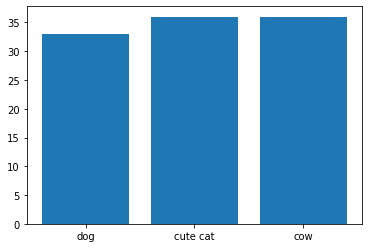

time: 177 ms (started: 2021-05-24 07:28:39 +00:00)


In [54]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)


time: 19.3 ms (started: 2021-05-24 07:28:39 +00:00)


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train) 


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 48s (started: 2021-05-24 07:28:39 +00:00)


In [57]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 2])

time: 166 ms (started: 2021-05-24 07:30:28 +00:00)


In [58]:
y_test

array([0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 1, 1, 1, 2])

time: 5.24 ms (started: 2021-05-24 07:30:28 +00:00)


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.85 ms (started: 2021-05-24 07:30:28 +00:00)


In [60]:
accuracy_score(y_pred,y_test)

0.46875

time: 6.18 ms (started: 2021-05-24 07:30:28 +00:00)


In [61]:
confusion_matrix(y_pred,y_test)

array([[3, 4, 2],
       [4, 5, 3],
       [2, 2, 7]])

time: 9.99 ms (started: 2021-05-24 07:30:28 +00:00)


In [62]:
 import pickle
 pickle.dump(clf,open('img_model.p','wb'))

time: 64.5 ms (started: 2021-05-24 07:30:28 +00:00)


In [63]:
model=pickle.load(open('img_model.p','rb'))

time: 29 ms (started: 2021-05-24 07:30:28 +00:00)


Enter the URL https://th.bing.com/th/id/OIP.juRDDhOC5I1YTOgmxGDtXgHaHa?w=177&h=180&c=7&o=5&dpr=1.5&pid=1.7
(270, 265, 3)
PREDICTED OUTPUT: cow


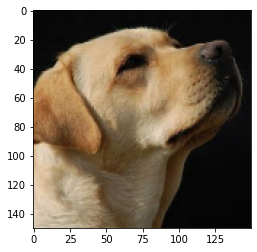

time: 27.6 s (started: 2021-05-24 07:34:47 +00:00)


In [65]:
flat_data =[]
url= input('Enter the URL ')
img = imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')